In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Funzione che genera grafici "radial delta"

In [12]:
def parseData(data):
  # parse time as datetime
  data["time"] = pd.to_datetime(data["time"])
  data.set_index("time", inplace=True)

  # rename columns
  data.rename(columns={
    "temperature_2m_max (°C)": "mplt_temp",
    "temperature_2m_min (°C)": "min_temp",
    "temperature_2m_mean (°C)": "mean_temp",
    "precipitation_sum (mm)": "precipitation",
    "rain_sum (mm)": "rain",
    "snowfall_sum (cm)": "snowfall",
    "shortwave_radiation_sum (MJ/m²)": "radiation",
    "et0_fao_evapotranspiration (mm)": "evapotranspiration"
  }, inplace=True)

  # fix null values
  data["precipitation"] = data["precipitation"].replace(np.nan, 0)

  return data

In [13]:
def generateDeltaGraph(data):
  
  data = parseData(data)

  data["decade"] = data.index.year // 10 * 10

  # group by decade and month
  decadal_monthly_avg = data.groupby(["decade", data.index.month])["mean_temp"].mean().reset_index()
  # average temperature for each decade for each month
  decadal_40_80 = decadal_monthly_avg[decadal_monthly_avg["decade"].between(1940, 1980, inclusive='both')]
  # average temperature for each month of the decade between 1940 and 1980
  avg_40_80 = decadal_40_80.groupby("time")["mean_temp"].mean().to_numpy()

  angles = np.deg2rad(np.linspace(0, 360, 12, endpoint=False))
  angles = np.append(angles, 0)

  fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

  colors = ["dodgerblue", "orange", "red"]

  i = 0
  for decade in range(1980, 2021, 20):
    temperatures = decadal_monthly_avg[decadal_monthly_avg["decade"] == decade]
    temperatures_data = temperatures["mean_temp"].to_numpy()
    
    # calculate delta: ((month i decade avg) - (month 1940-1980 average))
    # t = tuple(month_index, month_temperature), t[0] = index, t[1] = mean_temp
    temperatures_data = list(map(lambda t: t[1] - avg_40_80[t[0]], enumerate(temperatures_data)))

    temperatures_data = np.append(temperatures_data, temperatures_data[0])
    print(np.mean(temperatures_data))

    ax.plot(angles, temperatures_data, label=decade, color=colors[i])
    ax.fill(angles, temperatures_data, alpha=0.1, color=colors[i])
    i += 1

  ax.set_xticks(angles[:-1])
  ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

  ax.set_yticks(range(-1, 4, 1))
  ax.set_yticklabels(["%+d" % (t) + "°C" for t in range(-1, 4, 1)])

  ax.set_title("Monthly Delta Temperature Increase to 1940-1980")
  plt.legend(loc="lower right", bbox_to_anchor=(1.16, 0.00001))
  plt.show()


## Milano

0.18335159399272363
1.2886928449754889
1.9240342791727048


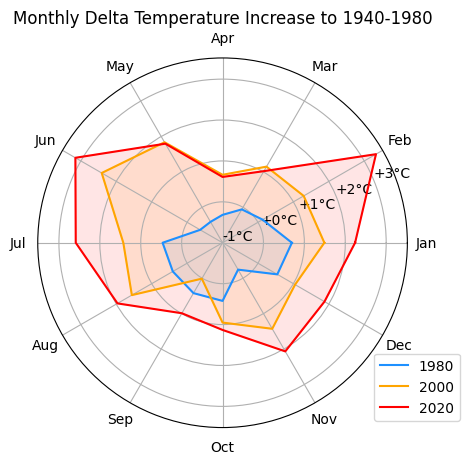

In [14]:
data = pd.read_csv("data/historical-weather-1940-2022/milano.csv")
generateDeltaGraph(data)


## Cagliari

-0.11612954985813385
0.5869059758077342
1.4590381827704906


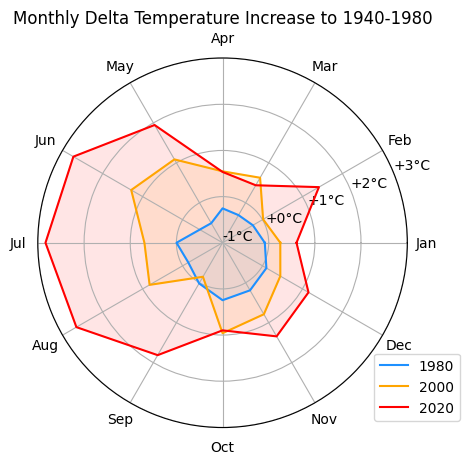

In [15]:
data = pd.read_csv("data/historical-weather-1940-2022/cagliari.csv")
generateDeltaGraph(data)

## Livigno

0.48350940010312315
1.3004593923579142
1.848075761299666


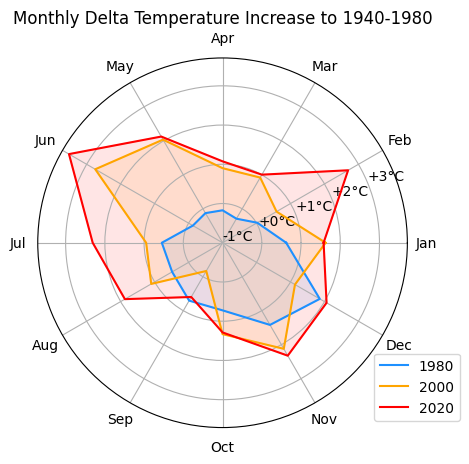

In [16]:
data = pd.read_csv("data/historical-weather-1940-2022/livigno.csv")
generateDeltaGraph(data)
